In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from scipy.stats import kurtosis, skew

In [4]:
htwt = pd.read_csv('D:/Snehas Prg 3rd sem/ML-AI/weight-height.csv')
htwt

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
htwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
htwt1 = htwt.drop(['Gender'], axis = 1)
htwt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [7]:
height =htwt1['Height']
weight= htwt1['Weight']

<Axes: xlabel='Height', ylabel='Weight'>

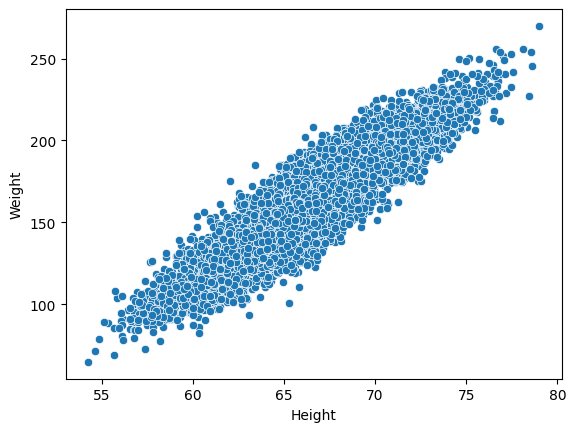

In [8]:
sns.scatterplot(x='Height', y='Weight', data=htwt1)

<Axes: >

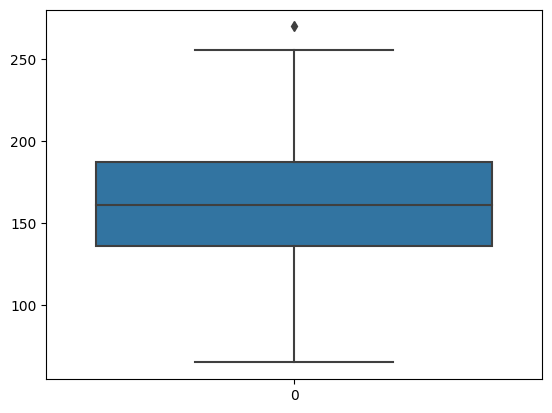

In [9]:
sns.boxplot(htwt1['Weight'])

<Axes: >

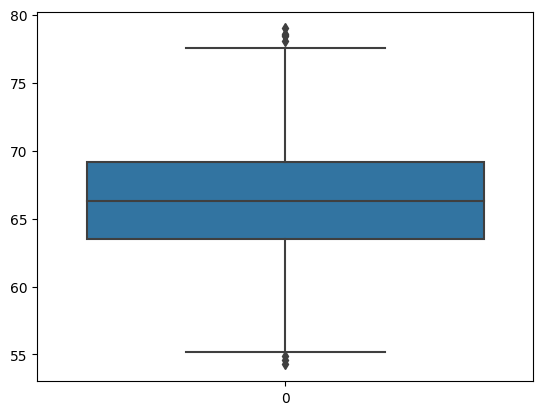

In [10]:
sns.boxplot(htwt1['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

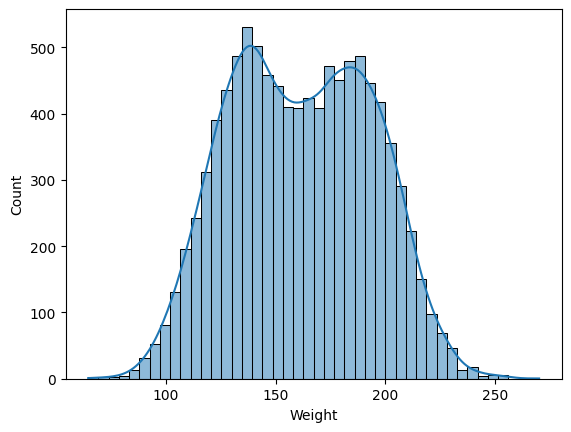

In [11]:
sns.histplot(data = htwt['Weight'], kde = True)

In [12]:
kurtosis(height)

-0.4744964698622529

In [13]:
kurtosis(weight)

-0.794820272085639

In [14]:
skew(height)

0.049361683712594605

In [15]:
skew(weight)

0.032949561065599514

<Axes: xlabel='Height', ylabel='Count'>

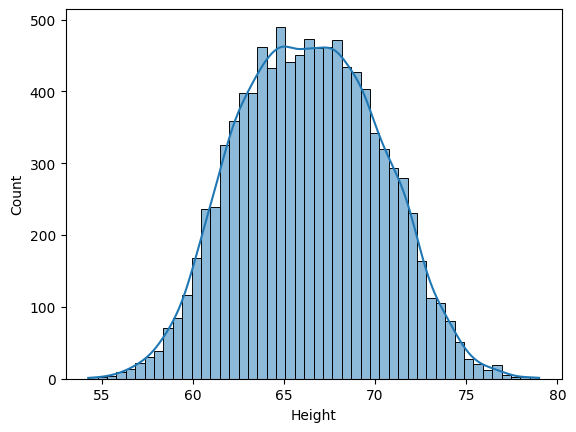

In [16]:
sns.histplot(data = htwt['Height'], kde = True)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
weightdf = pd.DataFrame(weight)
heightdf = pd.DataFrame(height)

In [19]:
model = LinearRegression()

In [20]:
model.fit(heightdf,weightdf)

LinearRegression()

In [21]:
model.predict(pd.DataFrame([80]))

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[266.64581945]])

In [22]:
print(model.score(heightdf, weightdf))

0.8551742120552468


# REMOVING OUTLIERS

<Axes: >

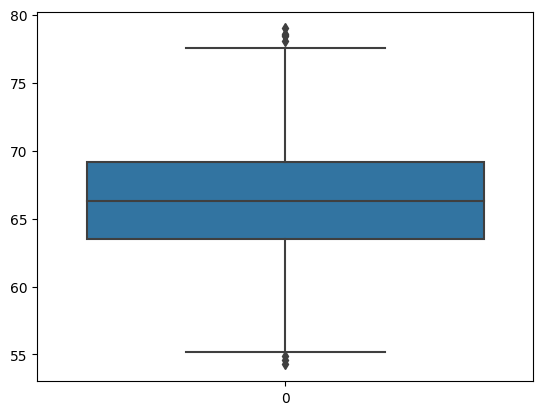

In [23]:
sns.boxplot(htwt1['Height'])

In [24]:
Q1 = np.percentile(htwt1['Height'], 25, interpolation='midpoint')
Q3 = np.percentile(htwt1['Height'], 75, interpolation='midpoint')
print(" Q1        : ",Q1)
print(" Q3        : ",Q3)

IQR = Q3-Q1
print(" IQR       : ",IQR)

print(" Old Shape : ", htwt1.shape)

#UPPER BOUND OUTLIERS
upper = np.where(htwt1['Height'] >= (Q3 + 1.5* IQR))

#LOWER BOUND OUTLIERS
lower = np.where(htwt1['Height'] <= (Q1 - 1.5* IQR))

print(upper)    
print(lower)    
print(upper[0]) 
print(lower[0]) 

#REMOVING OUTLIERS
htwt1.drop(upper[0], inplace =True)
htwt1.drop(lower[0], inplace=True)

htwt1.shape

 Q1        :  63.5053465
 Q3        :  69.174946535
 IQR       :  5.669600035000002
 Old Shape :  (10000, 2)
(array([ 994, 1317, 2014, 3285, 3757], dtype=int64),)
(array([6624, 7294, 9285], dtype=int64),)
[ 994 1317 2014 3285 3757]
[6624 7294 9285]


C:\Users\user\AppData\Local\Temp\ipykernel_1732\2741359789.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(htwt1['Height'], 25, interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_1732\2741359789.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(htwt1['Height'], 75, interpolation='midpoint')


(9992, 2)

<Axes: >

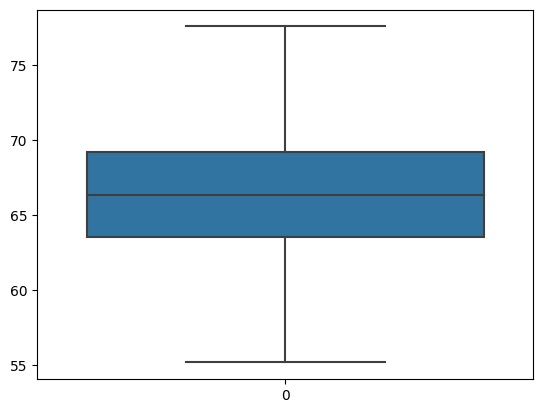

In [25]:
sns.boxplot(htwt1['Height'])